<a href="https://colab.research.google.com/github/khairiyah98/python_eda/blob/main/Qn1_and_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Set working directory
#@title Set up Directory { run: "auto"}
import os
from google.colab import drive 
drive.mount('/content/gdrive')
working_directory = 'My Drive/MND' #@param {type:"string"}
wd="/content/gdrive/"+working_directory
os.chdir(wd)

dirpath = os.getcwd()
print("current directory is : " + dirpath)

Mounted at /content/gdrive
current directory is : /content/gdrive/My Drive/MND


In [ ]:
#Import libraries
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#!pip install -U plotly

Obtaining Data from data.gov.sg

In [ ]:
query_string='https://data.gov.sg/api/action/datastore_search?resource_id=42ff9cfe-abe5-4b54-beda-c88f9bb438ee&limit=101994'
https://data.gov.sg/api/action/datastore_search?resource_id=42ff9cfe-abe5-4b54-beda-c88f9bb438ee&limit=5
https://data.gov.sg/api/action/datastore_search?resource_id=d0efb5d7-9348-41d8-9acf-ddbadca8fb22&limit=5
resp = requests.get(query_string)

In [ ]:
#Convert JSON into Python Object 
data = json.loads(resp.content)

# Checking the length of dataframe
len(data['result']['records'])

# Store our dictionart records into hdb_price_dict_records
hdb_price_dict_records = data['result']['records']

# Next we need to feed our JSON data into dataframe. 
# We will access the 'records' key:value pairs of the python dictionary. 
# We will then map the list into a dataframe.
town = []
flat_type = []
flat_model = []
floor_area_sqm = []
street_name = []
resale_price = []
month = []
remaining_lease = []
lease_commence_date = []
storey_range = []
_id = []
block = []

for i in range(0, len(hdb_price_dict_records)):
    town.append(hdb_price_dict_records[i]['town'])
    flat_type.append(hdb_price_dict_records[i]['flat_type'])
    flat_model.append(hdb_price_dict_records[i]['flat_model'])
    floor_area_sqm.append(hdb_price_dict_records[i]['floor_area_sqm'])
    street_name.append(hdb_price_dict_records[i]['street_name'])
    resale_price.append(hdb_price_dict_records[i]['resale_price'])
    month.append(hdb_price_dict_records[i]['month'])
    remaining_lease.append(hdb_price_dict_records[i]['remaining_lease'])
    lease_commence_date.append(hdb_price_dict_records[i]['lease_commence_date'])
    storey_range.append(hdb_price_dict_records[i]['storey_range'])
    _id.append(hdb_price_dict_records[i]['_id'])
    block.append(hdb_price_dict_records[i]['block'])
    
df_hdb_price = pd.DataFrame({
    'town': town,
    'flat_type': flat_type,
    'flat_model': flat_model,
    'floor_area_sqm': floor_area_sqm,
    'street_name': street_name,
    'resale_price': resale_price,
    'month': month,
    'remaining_lease': remaining_lease,
    'lease_commence_date': lease_commence_date,
    'storey_range': storey_range,
    '_id': _id,
    'block': block
})

In [ ]:
# Let's examine our dataframe
df_hdb_price.head()

town  flat_type         flat_model  ... storey_range _id block
0  SEMBAWANG     5 ROOM           Improved  ...     07 TO 09   1  501C
1  SEMBAWANG     5 ROOM           Improved  ...     04 TO 06   2  509A
2  SEMBAWANG  EXECUTIVE  Premium Apartment  ...     07 TO 09   3  360B
3  SEMBAWANG  EXECUTIVE  Premium Apartment  ...     10 TO 12   4  469B
4  SEMBAWANG  EXECUTIVE          Apartment  ...     04 TO 06   5   408

[5 rows x 12 columns]

In [ ]:
# Range of dates
df_hdb_price.month.unique()

array(['2017-12', '2018-05', '2018-01', '2018-08', '2018-02', '2019-01',
       '2018-03', '2019-10', '2021-01', '2018-04', '2018-06', '2018-07',
       '2018-09', '2018-10', '2018-11', '2018-12', '2019-02', '2019-03',
       '2019-04', '2019-05', '2019-07', '2019-08', '2019-11', '2019-06',
       '2019-09', '2019-12', '2020-05', '2020-06', '2020-07', '2020-10',
       '2020-12', '2020-02', '2020-09', '2020-01', '2020-03', '2020-04',
       '2020-08', '2020-11', '2021-04', '2021-05', '2021-02', '2021-03',
       '2021-06'], dtype=object)

In [ ]:
# Now, the next part gets a little tricky. We need to find the nearest MRT station the HDB unit is located in using their geo-location coordinates (Latitude, Longitude). We will use another API to achieve this - the OneMap API.
# First let's create a list of all the MRT stations in Singapore. 
# Since MRT stations change relatively slowly overtime, we can leverage a static list. 
# I obtained the data from Wikipedia, which also provides data on upcoming MRT stations.
# We will only consider existing MRT stations for now.

list_of_mrt = [
    'Jurong East MRT Station',
    'Bukit Batok MRT Station',
    'Bukit Gombak MRT Station',
    'Choa Chu Kang MRT Station',
    'Yew Tee MRT Station',
    'Kranji MRT Station',
    'Marsiling MRT Station',
    'Woodlands MRT Station',
    'Admiralty MRT Station',
    'Sembawang MRT Station',
    'Canberra MRT Station',
    'Yishun MRT Station',
    'Khatib MRT Station',
    'Yio Chu Kang MRT Station',
    'Ang Mo Kio MRT Station',
    'Bishan MRT Station',
    'Braddell MRT Station',
    'Toa Payoh MRT Station',
    'Novena MRT Station',
    'Newton MRT Station',
    'Orchard MRT Station',
    'Somerset MRT Station',
    'Dhoby Ghaut MRT Station',
    'City Hall MRT Station',
    'Raffles Place MRT Station',
    'Marina Bay MRT Station',
    'Marina South Pier MRT Station',
    'Pasir Ris MRT Station',
    'Tampines MRT Station',
    'Simei MRT Station',
    'Tanah Merah MRT Station',
    'Bedok MRT Station',
    'Kembangan MRT Station',
    'Eunos MRT Station',
    'Paya Lebar MRT Station',
    'Aljunied MRT Station',
    'Kallang MRT Station',
    'Lavender MRT Station',
    'Bugis MRT Station',
    'Tanjong Pagar MRT Station',
    'Outram Park MRT Station',
    'Tiong Bahru MRT Station',
    'Redhill MRT Station',
    'Queenstown MRT Station',
    'Commonwealth MRT Station',
    'Buona Vista MRT Station',
    'Dover MRT Station',
    'Clementi MRT Station',
    'Chinese Garden MRT Station',
    'Lakeside MRT Station',
    'Boon Lay MRT Station',
    'Pioneer MRT Station',
    'Joo Koon MRT Station',
    'Gul Circle MRT Station',
    'Tuas Crescent MRT Station',
    'Tuas West Road MRT Station',
    'Tuas Link MRT Station',
    'Expo MRT Station',
    'Changi Airport MRT Station',
    'HarbourFront MRT Station',
    'Chinatown MRT Station',
    'Clarke Quay MRT Station',
    'Little India MRT Station',
    'Farrer Park MRT Station',
    'Boon Keng MRT Station',
    'Potong Pasir MRT Station',
    'Woodleigh MRT Station',
    'Serangoon MRT Station',
    'Kovan MRT Station',
    'Hougang MRT Station',
    'Buangkok MRT Station',
    'Sengkang MRT Station',
    'Punggol MRT Station',
    'Bras Basah MRT Station',
    'Esplanade MRT Station',
    'Promenade MRT Station',
    'Nicoll Highway MRT Station',
    'Stadium MRT Station',
    'Mountbatten MRT Station',
    'Dakota MRT Station',
    'MacPherson MRT Station',
    'Tai Seng MRT Station',
    'Bartley MRT Station',
    'Lorong Chuan MRT Station',
    'Marymount MRT Station',
    'Caldecott MRT Station',
    'Botanic Gardens MRT Station',
    'Farrer Road MRT Station',
    'Holland Village MRT Station',
    'one-north MRT Station',
    'Kent Ridge MRT Station',
    'Haw Par Villa MRT Station',
    'Pasir Panjang MRT Station',
    'Labrador Park MRT Station',
    'Telok Blangah MRT Station',
    'Bayfront MRT Station',
    'Bukit Panjang MRT Station',
    'Cashew MRT Station',
    'Hillview MRT Station',
    'Beauty World MRT Station',
    'King Albert Park MRT Station',
    'Sixth Avenue MRT Station',
    'Tan Kah Kee MRT Station',
    'Stevens MRT Station',
    'Rochor MRT Station',
    'Downtown MRT Station',
    'Telok Ayer MRT Station',
    'Fort Canning MRT Station',
    'Bencoolen MRT Station',
    'Jalan Besar MRT Station',
    'Bendemeer MRT Station',
    'Geylang Bahru MRT Station',
    'Mattar MRT Station',
    'Ubi MRT Station',
    'Kaki Bukit MRT Station',
    'Bedok North MRT Station',
    'Bedok Reservoir MRT Station',
    'Tampines West MRT Station',
    'Tampines East MRT Station',
    'Upper Changi MRT Station'
]

In [ ]:
# We will use the OneMap API to obtain the (lat, long) coordinates of each MRT station.
# Obtaining MRT coordinates in Singapore
mrt_lat = []
mrt_long = []

for i in range(0, len(list_of_mrt)):
    query_address = list_of_mrt[i]
    query_string = 'https://developers.onemap.sg/commonapi/search?searchVal='+str(query_address)+'&returnGeom=Y&getAddrDetails=Y'
    resp = requests.get(query_string)

    data_mrt=json.loads(resp.content)
    
    if data_mrt['found'] != 0:
        mrt_lat.append(data_mrt["results"][0]["LATITUDE"])
        mrt_long.append(data_mrt["results"][0]["LONGITUDE"])

        print (str(query_address)+",Lat: "+data_mrt['results'][0]['LATITUDE'] +" Long: "+data_mrt['results'][0]['LONGITUDE'])

    else:
        mrt_lat.append('NotFound')
        mrt_lat.append('NotFound')
        print ("No Results")

# Store this information in a dataframe
mrt_location = pd.DataFrame({
    'MRT': list_of_mrt,
    'Latitude': mrt_lat,
    'Longitude': mrt_long
})

Jurong East MRT Station,Lat: 1.33357652289465 Long: 103.742292350324
Bukit Batok MRT Station,Lat: 1.34842377665437 Long: 103.749126361849
Bukit Gombak MRT Station,Lat: 1.35930937732431 Long: 103.751948590322
Choa Chu Kang MRT Station,Lat: 1.38575650064861 Long: 103.744509334035
Yew Tee MRT Station,Lat: 1.39753506936297 Long: 103.747405150236
Kranji MRT Station,Lat: 1.42513172976083 Long: 103.762492227566
Marsiling MRT Station,Lat: 1.43275722977074 Long: 103.773981720213
Woodlands MRT Station,Lat: 1.43659643136072 Long: 103.78584424633
Admiralty MRT Station,Lat: 1.44053338763298 Long: 103.801364534318
Sembawang MRT Station,Lat: 1.44892733136332 Long: 103.820401560553
Canberra MRT Station,Lat: 1.44280097163894 Long: 103.830409234978
Yishun MRT Station,Lat: 1.42966559741799 Long: 103.83564365509
Khatib MRT Station,Lat: 1.41789179005502 Long: 103.833171755256
Yio Chu Kang MRT Station,Lat: 1.3819602145119 Long: 103.844651533361
Ang Mo Kio MRT Station,Lat: 1.36988737282394 Long: 103.84982570

In [ ]:
mrt_location.head()

MRT          Latitude         Longitude
0    Jurong East MRT Station  1.33357652289465  103.742292350324
1    Bukit Batok MRT Station  1.34842377665437  103.749126361849
2   Bukit Gombak MRT Station  1.35930937732431  103.751948590322
3  Choa Chu Kang MRT Station  1.38575650064861  103.744509334035
4        Yew Tee MRT Station  1.39753506936297  103.747405150236

In [ ]:
# Now - let's find grab the geolocation of each unit that was transacated using the same method. 
# But hang on - that's a large dataset.. we can make it a bit more efficient. 
# We know that there will be multiple units that will be transacted in the same HDB Apartment block. 
# We can de-duplicate our dataframe and obtion the only unique addresses in our dataframe. 

# Let's combine the block and street name to form the address of our transacted unit.
df_hdb_price['address'] = df_hdb_price['block'] + " " + df_hdb_price['street_name']

# Deduplicate Address List
df_dedup = df_hdb_price.drop_duplicates(subset='address', keep='first')
len(df_dedup)

# Next let's grab the unique addresses and create a list 
address_list = df_dedup['address'].tolist()
len(address_list)

# This takes a few hours
# If you don't want to run this, you can import the final dataset combined.csv below
latitude = []
longitude = []
blk_no = []
road_name = []
postal_code = []
address = []
count = 0

for row in range(len(address_list)):
    #formulate query string  
    query_address = address_list[row]
    query_string='https://developers.onemap.sg/commonapi/search?searchVal='+str(query_address)+'&returnGeom=Y&getAddrDetails=Y'
    resp = requests.get(query_string)          

    #Convert JSON into Python Object 
    data_geo_location=json.loads(resp.content)
    if data_geo_location['found'] != 0:
        latitude.append(data_geo_location['results'][0]['LATITUDE'])
        longitude.append(data_geo_location['results'][0]['LONGITUDE'])
        blk_no.append(data_geo_location['results'][0]['BLK_NO'])
        road_name.append(data_geo_location['results'][0]['ROAD_NAME'])
        postal_code.append(data_geo_location['results'][0]['POSTAL'])
        address.append(query_address)
        print (str(query_address) + " ,Lat: " + data_geo_location['results'][0]['LATITUDE'] + " Long: " + data_geo_location['results'][0]['LONGITUDE'])
    else:
        print ("No Results")

# Fit into a dataframe
df_coordinates = pd.DataFrame({
    'latitude': latitude,
    'longitude': longitude,
    'blk_no': blk_no,
    'road_name': road_name,
    'postal_code': postal_code,
    'address': address
})

Streaming output truncated to the last 5000 lines.
585 ANG MO KIO AVE 3 ,Lat: 1.37059756050933 Long: 103.852367040901
346 ANG MO KIO AVE 3 ,Lat: 1.36709586875167 Long: 103.84966230288
108 ANG MO KIO AVE 4 ,Lat: 1.37094273993858 Long: 103.837974822369
425 ANG MO KIO AVE 3 ,Lat: 1.36915358068729 Long: 103.851746834886
302 ANG MO KIO AVE 3 ,Lat: 1.36708983179045 Long: 103.845660199054
106 ANG MO KIO AVE 4 ,Lat: 1.37193370323489 Long: 103.837486061851
307C ANG MO KIO AVE 1 ,Lat: 1.36556100435159 Long: 103.845169497182
511 ANG MO KIO AVE 8 ,Lat: 1.37356775015905 Long: 103.850154125155
226 ANG MO KIO AVE 1 ,Lat: 1.36772803186644 Long: 103.838404951621
560 ANG MO KIO AVE 10 ,Lat: 1.37081626777721 Long: 103.859192334256
537 ANG MO KIO AVE 5 ,Lat: 1.37520009617687 Long: 103.853059796325
337 ANG MO KIO AVE 1 ,Lat: 1.36319555672391 Long: 103.851616001112
212 ANG MO KIO AVE 3 ,Lat: 1.36880359418469 Long: 103.841618072603
521 ANG MO KIO AVE 5 ,Lat: 1.37357054041245 Long: 103.851551329495
714 ANG MO

In [ ]:
df_coordinates.shape

(8955, 6)

In [ ]:
# Awesome! Now we have both the lat and long of our dataset. 
list_of_lat = df_coordinates['latitude']
list_of_long = df_coordinates['longitude']

# List of coordinates of all unique addresses in our dataset
list_of_coordinates = []
for lat, long in zip(list_of_lat, list_of_long):
    list_of_coordinates.append((lat,long))

len(list_of_coordinates)

# List of MRT Coordinates in Singapore
mrt_lat = mrt_location['Latitude']
mrt_long = mrt_location['Longitude']

list_of_mrt_coordinates = []

for lat, long in zip(mrt_lat, mrt_long):
    list_of_mrt_coordinates.append((lat, long))
    
len(list_of_mrt_coordinates)

120

In [ ]:
# Distance to nearest MRT
from geopy.distance import geodesic

list_of_dist_mrt = []
min_dist_mrt = []

for origin in list_of_coordinates:
    for destination in range(0, len(list_of_mrt_coordinates)):
        list_of_dist_mrt.append(geodesic(origin,list_of_mrt_coordinates[destination]).meters)
    shortest = (min(list_of_dist_mrt))
    min_dist_mrt.append(shortest)
    list_of_dist_mrt.clear()

In [ ]:
# Distance from CBD
cbd_dist = []

for origin in list_of_coordinates:
    cbd_dist.append(geodesic(origin,(1.2830, 103.8513)).meters)

# Putting it all together
df_coordinates['min_dist_mrt'] = min_dist_mrt
df_coordinates['cbd_dist'] = cbd_dist

df_coordinates.head()

latitude         longitude  ... min_dist_mrt      cbd_dist
0  1.35181593598792  103.888448131093  ...   998.476424   8659.876214
1  1.36360388866544  103.890049841364  ...   671.695293   9901.250522
2  1.35253849426887  103.878702628192  ...   627.275377   8271.896856
3  1.37715967450288  103.879679968404  ...  1555.206062  10880.204591
4  1.37696693831982  103.879223534354  ...  1592.996205  10845.147904

[5 rows x 8 columns]

In [ ]:
combined = df_coordinates.merge(df_hdb_price, on="address", how='outer')

In [ ]:
# Data Cleaning and Hygiene
combined['resale_price'] = combined['resale_price'].astype('float')
combined['floor_area_sqm'] = combined['floor_area_sqm'].astype('float')
combined['lease_commence_date'] = combined['lease_commence_date'].astype('int64')
combined['lease_remain_years'] = 2019 - combined['lease_commence_date']
combined.columns

combined.dropna(inplace=True)

combined['price_per_sqm'] = combined['resale_price'].div(combined['floor_area_sqm'])

In [ ]:
combined.to_csv('data/combined.csv')

In [ ]:
combined = pd.read_csv('data/combined.csv', index_col=0)

In [ ]:
combined.head()

latitude   longitude blk_no  ... block lease_remain_years price_per_sqm
0  1.351816  103.888448    167  ...   167                 22   4902.439024
1  1.351816  103.888448    167  ...   167                 22   4211.382114
2  1.351816  103.888448    167  ...   167                 22   4512.195122
3  1.351816  103.888448    167  ...   167                 22   4390.243902
4  1.351816  103.888448    167  ...   167                 22   3712.871287

[5 rows x 22 columns]

### Choropleth map to illustrate how prices for a 4-Room HDB resale flat vary across different areas of Singapore

In [ ]:
!pip install geopandas

import pandas as pd
import matplotlib.pyplot as plt #if using matplotlib
import plotly.express as px #if using plotly
import geopandas as gpd

     |████████████████████████████████| 1.0MB 8.4MB/s 
     |████████████████████████████████| 15.4MB 178kB/s 
     |████████████████████████████████| 6.6MB 39.8MB/s 


In [ ]:
#set up the file path and read the shapefile data
fp = 'master_plan/MP14_PLNG_AREA_NO_SEA_PL.shp'
map_df = gpd.read_file(fp)

In [ ]:
map_df.head()

OBJECTID  ...                                           geometry
0         1  ...  POLYGON ((30658.500 42047.527, 30679.195 42020...
1         2  ...  POLYGON ((38974.269 36138.243, 39371.471 35747...
2         3  ...  POLYGON ((29772.191 38311.805, 29784.826 38304...
3         4  ...  POLYGON ((12861.383 32207.492, 12860.555 32208...
4         5  ...  POLYGON ((20294.455 39114.528, 20334.318 39054...

[5 rows x 13 columns]

In [ ]:
map_df.PLN_AREA_N.unique().size

55

In [ ]:
map_df.PLN_AREA_N.unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BOON LAY', 'BUKIT BATOK',
       'BUKIT MERAH', 'BUKIT PANJANG', 'BUKIT TIMAH', 'GEYLANG',
       'KALLANG', 'NOVENA', 'PASIR RIS', 'HOUGANG', 'JURONG EAST',
       'LIM CHU KANG', 'MANDAI', 'MARINE PARADE', 'NORTH-EASTERN ISLANDS',
       'PIONEER', 'JURONG WEST', 'PAYA LEBAR', 'PUNGGOL', 'QUEENSTOWN',
       'SELETAR', 'SEMBAWANG', 'SENGKANG', 'SERANGOON',
       'CENTRAL WATER CATCHMENT', 'CHANGI', 'SUNGEI KADUT', 'TAMPINES',
       'DOWNTOWN CORE', 'TANGLIN', 'TENGAH', 'TOA PAYOH', 'MARINA EAST',
       'WOODLANDS', 'MARINA SOUTH', 'MUSEUM', 'NEWTON', 'CHANGI BAY',
       'CHOA CHU KANG', 'CLEMENTI', 'SINGAPORE RIVER', 'STRAITS VIEW',
       'SIMPANG', 'SOUTHERN ISLANDS', 'TUAS', 'WESTERN ISLANDS',
       'WESTERN WATER CATCHMENT', 'YISHUN', 'ORCHARD', 'OUTRAM',
       'RIVER VALLEY', 'ROCHOR'], dtype=object)

In [ ]:
# filter data to 4-room flat only
four_rm = combined[(combined.flat_type == "4 ROOM")]

In [ ]:
four_rm.shape

(32404, 22)

In [ ]:
four_rm.town.unique()

array(['HOUGANG', 'JURONG EAST', 'PUNGGOL', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'QUEENSTOWN',
       'SENGKANG', 'SEMBAWANG', 'SERANGOON', 'TAMPINES', 'TOA PAYOH',
       'WOODLANDS', 'YISHUN', 'ANG MO KIO', 'BEDOK', 'BISHAN',
       'BUKIT BATOK', 'BUKIT MERAH', 'BUKIT PANJANG', 'BUKIT TIMAH',
       'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI', 'GEYLANG'],
      dtype=object)

In [ ]:
# these addresses are in Rochor; to be renamed

four_rm[(four_rm.town == "CENTRAL AREA")].road_name.unique()

array(['VEERASAMY ROAD', 'BUFFALO ROAD', 'KLANG LANE', 'WATERLOO STREET',
       'CANTONMENT ROAD', 'CHIN SWEE ROAD', 'ROWELL ROAD', 'SMITH STREET',
       'BAIN STREET', 'CHANDER ROAD', 'TANJONG PAGAR PLAZA',
       'QUEEN STREET', 'JALAN BERSEH', 'KRETA AYER ROAD', 'JALAN KUKOH'],
      dtype=object)

In [ ]:
# group by town, then get median resale price for each town
four_rm_final = four_rm.groupby(["town"])['resale_price'].median().reset_index()

In [ ]:
four_rm_final.shape

(26, 2)

In [ ]:
four_rm_final.head()

town  resale_price
0   ANG MO KIO      420000.0
1        BEDOK      402500.0
2       BISHAN      548000.0
3  BUKIT BATOK      370000.0
4  BUKIT MERAH      680000.0

In [ ]:
# replace and map the values in the dataframe
# Convert values CENTRAL AREA to ROCHOR and KALLANG/WHAMPOA to KALLANG

four_rm_final = four_rm_final.replace(['KALLANG/WHAMPOA','CENTRAL AREA'],['KALLANG','ROCHOR'])

In [ ]:
df_merged = map_df.merge(four_rm_final, #map_df merge to four_rm_final
 left_on=['PLN_AREA_N'], 
 right_on=['town'],   how = "left")

In [ ]:
df_merged = df_merged.fillna(0)

In [ ]:
df_merged.shape

(55, 15)

In [ ]:
df_merged.head()

OBJECTID   PLN_AREA_N  ...         town resale_price
0         1   ANG MO KIO  ...   ANG MO KIO     420000.0
1         2        BEDOK  ...        BEDOK     402500.0
2         3       BISHAN  ...       BISHAN     548000.0
3         4     BOON LAY  ...            0          0.0
4         5  BUKIT BATOK  ...  BUKIT BATOK     370000.0

[5 rows x 15 columns]

(-18.9071000003255, 59082.885100000436, 14023.340335000865, 51981.714965000196)

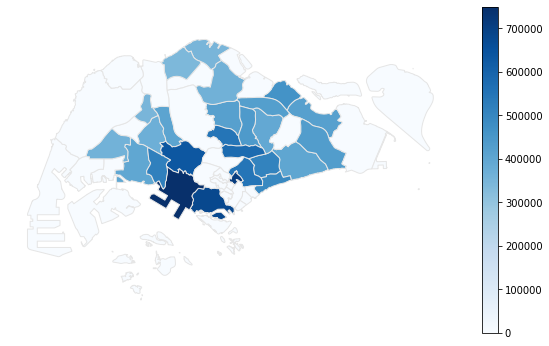

In [ ]:
# static visualization

fig, ax = plt.subplots(1, figsize=(10,6))
df_merged.plot(column='resale_price', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')

In [ ]:
new_df = df_merged[['PLN_AREA_N', 'geometry', 'resale_price']]
new_df.head()

PLN_AREA_N                                           geometry  resale_price
0   ANG MO KIO  POLYGON ((30658.500 42047.527, 30679.195 42020...      420000.0
1        BEDOK  POLYGON ((38974.269 36138.243, 39371.471 35747...      402500.0
2       BISHAN  POLYGON ((29772.191 38311.805, 29784.826 38304...      548000.0
3     BOON LAY  POLYGON ((12861.383 32207.492, 12860.555 32208...           0.0
4  BUKIT BATOK  POLYGON ((20294.455 39114.528, 20334.318 39054...      370000.0

In [ ]:
# Importing required Libraries
import json
import numpy as np
import geopandas as gpd
import folium
import branca.colormap as cm

In [ ]:
#interactive visualzation below onwards

mymap = mapa = folium.Map(location=[1.28, 103.85], zoom_start=11)
folium.TileLayer('CartoDB positron',name="Light Map",control=False).add_to(mymap)
#mymap

In [ ]:
mymap.choropleth(
 geo_data=df_merged,
 name='Choropleth',
 data=df_merged,
 columns=['PLN_AREA_N','resale_price'],
 key_on="feature.properties.PLN_AREA_N",
 fill_color='YlGnBu',
 fill_opacity=1,
 line_opacity=0.2,
 legend_name='Median resale price',
 smooth_factor=0
)
#mymap

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



In [ ]:
style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
NIL = folium.features.GeoJson(
    df_merged,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['PLN_AREA_N','resale_price'],
        aliases=['Neighborhood: ','Median resale price'],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
mymap.add_child(NIL)
mymap.keep_in_front(NIL)
folium.LayerControl().add_to(mymap)
mymap

## Hedonic regression model to estimate how the selling price of a HDB resale flat changes based on: 

1.   distance to the CBD
2.   distance nearest MRT station
3. flat size (and flat type)
4. floor level
5. years of lease remaining

EDA and data preprocessing

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


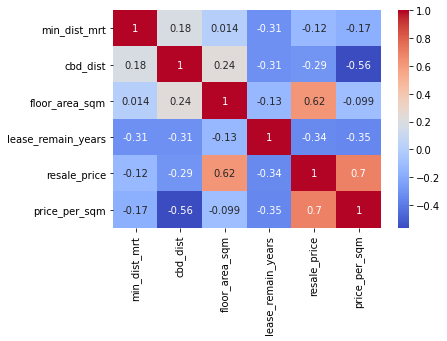

In [ ]:
# Import seaborn
import seaborn as sns

# Let's examine the correlation between our features
df_numerical_cols = combined[['min_dist_mrt', 'cbd_dist','floor_area_sqm', 'lease_remain_years', 'resale_price', 'price_per_sqm']]

df_numerical_cols.describe().round(0)

df_numerical_cols.dropna(inplace=True)

df_numerical_cols.isna().sum()


corrMatrix = df_numerical_cols.corr()
sns.heatmap(corrMatrix, 
        xticklabels=corrMatrix.columns,
        yticklabels=corrMatrix.columns,
        cmap='coolwarm',
        annot=True)

In [ ]:
df_reg = combined[['town', 'flat_type', 'storey_range', 'min_dist_mrt','cbd_dist','floor_area_sqm', 'lease_remain_years', 'resale_price', 'price_per_sqm']]

df_reg['flat_type'].value_counts()

# Mapping ordinal categories to their respective values
flat_type_map = {
    'EXECUTIVE': 7,
    'MULTI-GENERATION': 6,
    '5 ROOM': 5,
    '4 ROOM': 4,
    '3 ROOM': 3,
    '2 ROOM': 2,
    '1 ROOM': 1
}

df_reg['flat_type_mapped'] = df_reg['flat_type'].map(lambda x: flat_type_map[x])

df_reg.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


town flat_type  ... price_per_sqm  flat_type_mapped
0  HOUGANG    5 ROOM  ...   4902.439024                 5
1  HOUGANG    5 ROOM  ...   4211.382114                 5
2  HOUGANG    5 ROOM  ...   4512.195122                 5
3  HOUGANG    5 ROOM  ...   4390.243902                 5
4  HOUGANG    4 ROOM  ...   3712.871287                 4

[5 rows x 10 columns]

In [ ]:
# create new column, 'storey mean', to represent storey of HDB unit

df_reg['storey_range'].value_counts()

def split_mean(x):
    split_list = x.split(' TO ')
    mean = (float(split_list[0])+float(split_list[1]))/2
    return mean

df_reg['storey_mean'] = df_reg['storey_range'].apply(lambda x: split_mean(x))

df_reg.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


town flat_type storey_range  ...  price_per_sqm  flat_type_mapped  storey_mean
0  HOUGANG    5 ROOM     10 TO 12  ...    4902.439024                 5         11.0
1  HOUGANG    5 ROOM     04 TO 06  ...    4211.382114                 5          5.0
2  HOUGANG    5 ROOM     10 TO 12  ...    4512.195122                 5         11.0
3  HOUGANG    5 ROOM     10 TO 12  ...    4390.243902                 5         11.0
4  HOUGANG    4 ROOM     04 TO 06  ...    3712.871287                 4          5.0

[5 rows x 11 columns]

Applying models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
model_rmse_score = []

In [ ]:
# Train, test, split
X = df_reg[['cbd_dist','min_dist_mrt', 'floor_area_sqm',
       'storey_mean', 'lease_remain_years', 'flat_type_mapped']]

y = df_reg['resale_price']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm_reg = LinearRegression().fit(X_train, y_train)

In [ ]:
# Compute y_pred_lm
y_pred_lm = lm_reg.predict(X_test)

# Compute rmse_lm
mse_lm = MSE(y_test, y_pred_lm)

# Compute rmse_lm
rmse_lm = mse_lm**(1/2)

# Print rmse_lm
print("Test set RMSE of Linear Regression: {:.2f}".format(rmse_lm))

# Append to rmse list
model_rmse_score.append({'Linear Regression': rmse_lm})

Test set RMSE of Linear Regression: 67014.45


In [ ]:
lm_reg.score(X_train, y_train)

0.818983681983974

In [ ]:
lm_feature_importance = pd.DataFrame({
    "feature": X.columns,
    "coef_": lm_reg.coef_
})

In [ ]:
lm_feature_importance.head()

feature        coef_
0            cbd_dist   -18.804376
1        min_dist_mrt   -59.788385
2      floor_area_sqm  3896.881419
3         storey_mean  5036.899421
4  lease_remain_years -4783.107306

Random Forest Regression

In [ ]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=100,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=2, verbose=0, warm_start=False)

In [ ]:
# Predict the test set labels
y_pred_rf = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test_rf = np.sqrt(MSE(y_test, y_pred_rf))

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test_rf))

Test set RMSE of rf: 31131.88


In [ ]:
model_rmse_score.append({"Random Forest Regression": rmse_test_rf })

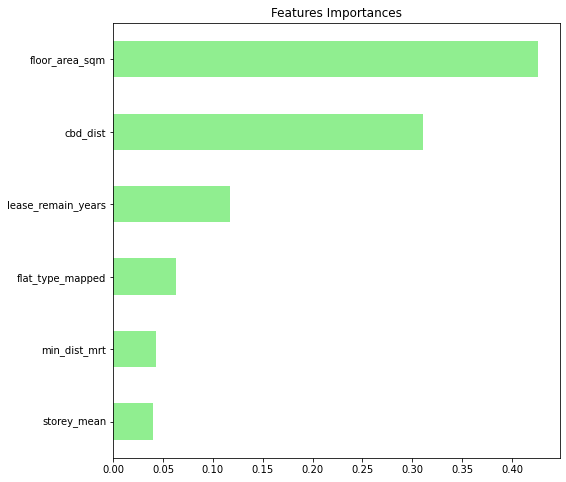

In [ ]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
plt.figure(figsize=(8,8))
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

In [ ]:
rf.score(X_train, y_train)

0.9902760430724882

In [ ]:
rf.score(X_test, y_test)

0.9603065348845148

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


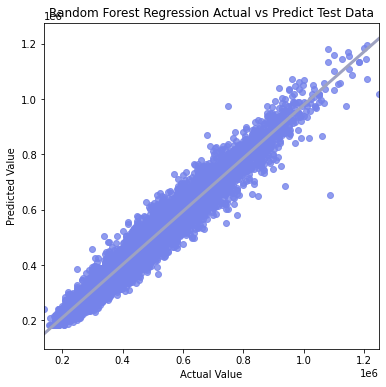

In [ ]:
plt.figure(figsize=(6,6))
sns.regplot(y_test, y_pred_rf, scatter_kws=dict(color="#7583EA"), line_kws=dict(color="#9EA2C1", linewidth=3))
plt.title("Random Forest Regression Actual vs Predict Test Data")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


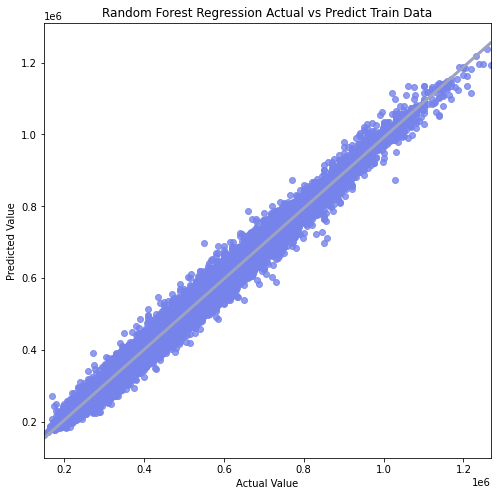

In [ ]:
y_pred = rf.predict(X_train)

plt.figure(figsize=(8,8))
sns.regplot(y_train, y_pred, scatter_kws=dict(color="#7583EA"), line_kws=dict(color="#9EA2C1", linewidth=3))
plt.title("Random Forest Regression Actual vs Predict Train Data")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.show()

XGBoost Model

In [ ]:
# Import xgboost
import xgboost as xgb

# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective="reg:squarederror",n_estimator=100,seed=123)

# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimator=100,
             n_estimators=100, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=123, silent=None,
             subsample=1, verbosity=1)

In [ ]:
# Predict the labels of the test set: preds
pred_xgb = xg_reg.predict(X_test)

# Compute the rmse: rmse
rmse_test_xgb =(MSE(y_test, pred_xgb))**(1/2)
print("RMSE: %f" % (rmse_test_xgb))

model_rmse_score.append({"XGBoost Regression": np.mean(rmse_test_xgb)})

RMSE: 49694.734369


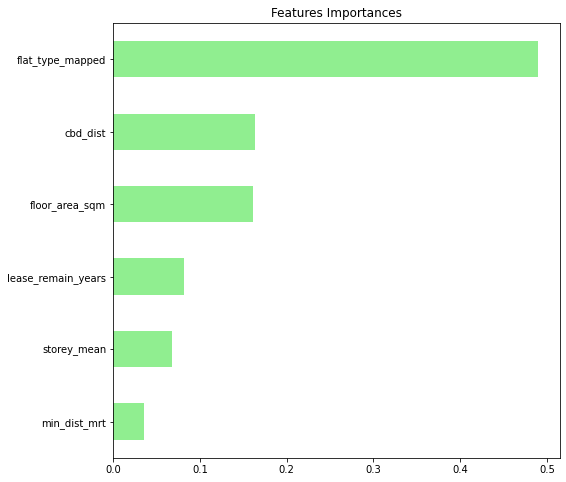

In [ ]:
# Create a pd.Series of features importances
xgb_importances = pd.Series(data=xg_reg.feature_importances_,
                        index= X_train.columns)

# Sort importances
xgb_importances_sorted = xgb_importances.sort_values()

# Draw a horizontal barplot of importances_sorted
plt.figure(figsize=(8,8))
xgb_importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

In [ ]:
model_rmse_score

[{'Linear Regression': 67014.45392280804},
 {'Random Forest Regression': 31131.883160433983},
 {'XGBoost Regression': 49694.734369404716}]